Топ-3 предсказаний:
running shoe: 98.08%
shoe store: 1.89%
clothes iron: 0.02%


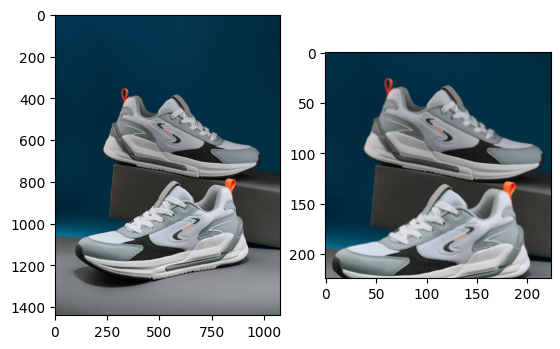

In [ ]:
import torch
from torchvision import models
from torchvision.transforms import v2
from torchvision.transforms.v2 import Compose
from PIL import Image
# Загрузка меток классов
import requests
from predict_top3 import predict_top3
import matplotlib.pyplot as plt

imagenet_labels_url: str = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
classes: list[str] = requests.get(imagenet_labels_url).json()

# Загрузка предобученной модели ResNet и перевод её в режим инференса
# Создание пустой модели
model = models.resnet18(weights="DEFAULT") 

# # Загрузка весов
# model.load_state_dict(torch.load('/models/resnet18_weights.pth'))
model.eval()

# Определение преобразований для изображения
transform: Compose = v2.Compose([
    v2.Resize(256),
    v2.CenterCrop(224),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_bee: Compose = v2.Compose([
    v2.Resize(256),
    v2.CenterCrop(224)])


image: Image.Image = Image.open('./data/sneakers.jpg').convert('RGB')
# Пример использования функции
predictions: list[str] = predict_top3(model, image, classes, transform=transform)
print("Топ-3 предсказаний:")
if isinstance(predictions, list):
    for pred in predictions:
        print(pred)
    transformed_image = transform_bee(image)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(transformed_image)
else:
    print('Error with predictions type')

Оригинал: ['running shoe: 98.08%', 'shoe store: 1.89%', 'clothes iron: 0.02%']
С шумом: ['running shoe: 97.79%', 'shoe store: 1.03%', 'slip-on shoe: 0.27%']


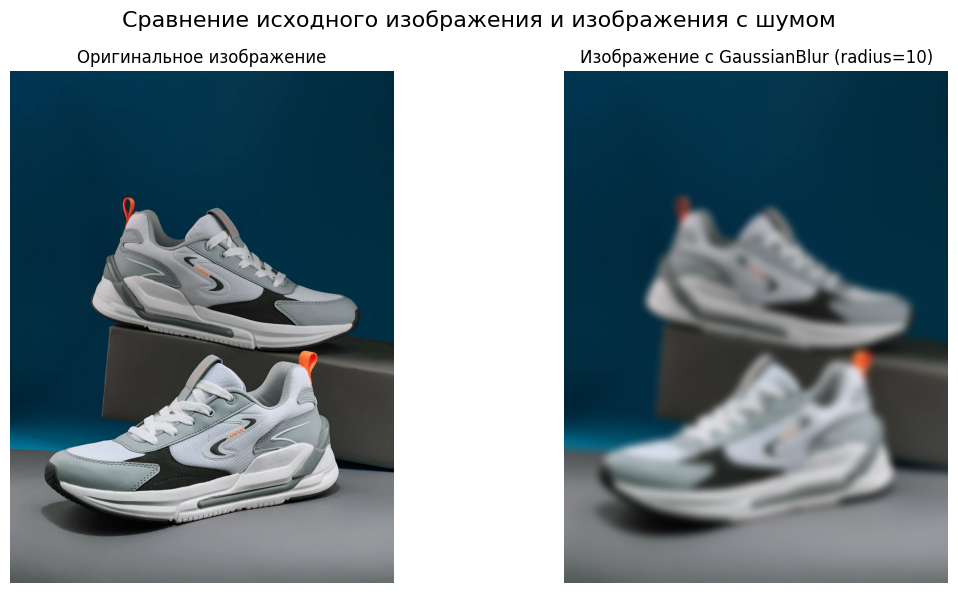

In [ ]:
import torch
from torchvision import models
from torchvision.transforms import v2
from PIL import Image, ImageFilter
import requests
import matplotlib.pyplot as plt
from predict_top3 import predict_top3

imagenet_labels_url: str = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
classes = requests.get(imagenet_labels_url).json()

# Загрузка предобученной модели ResNet и перевод её в режим инференса
# Создание пустой модели
model = models.resnet18(weights='DEFAULT') 

# # Загрузка весов
# model.load_state_dict(torch.load('/models/resnet18_weights.pth'))
model.eval()

# Определение преобразований для изображения
transform = v2.Compose([
            v2.Resize(256),
            v2.CenterCrop(224),
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


image: Image.Image = Image.open("./data/sneakers.jpg").convert('RGB')

# Добавляем размытие с помощью фильтра GaussianBlur
blurred_image: Image.Image =image.filter(ImageFilter.GaussianBlur(radius=10))

# Сравниваем предсказания для оригинального изображения и изображения с шумом
original_pred: list[str] = predict_top3(model, image, classes, transform)
blurred_pred: list[str] = predict_top3(model, blurred_image, classes, transform)

print("Оригинал:", original_pred)
print("С шумом:", blurred_pred)

# Отображаем оригинальное и размытое изображение рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Оригинальное изображение")
axes[0].axis("off")

axes[1].imshow(blurred_image)
axes[1].set_title("Изображение с GaussianBlur (radius=10)")
axes[1].axis("off")

plt.suptitle("Сравнение исходного изображения и изображения с шумом", fontsize=16)
plt.tight_layout()
plt.show()